# Notebook for the post splitting exploratory data analysis:

In [67]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import umap

In [30]:
data_map={
    'HIV': {'target':'HIV_active','structure':'smiles'},
    'bace':{'target':'active','structure':'mol'},
    'tox21':{'target':'NR-AhR','structure':'smiles'},
    'clintox':{'target':'CT_TOX','structure':'smiles'},
    'sol_del':{'target':'binned_sol','structure':'smiles'},
    'deepchem_Lipophilicity':{'target':'drug_like','structure':'smiles'}   
}

data_path='data_split_cleaned'
data_path_original= 'data_cleaned'

In [40]:
# Explore the original data sets:
eda_dict={'dataset':[],'size':[],'positive_class_ratio':[],'positive_count':[],'negative_count':[],'null_values':[]}

for file in data_map:
    df=pd.read_csv(os.path.join(data_path_original,file+'.csv'))
    structure=data_map[file]['structure']
    target=data_map[file]['target']
    pos_class=df[target].value_counts()[1]
    neg_class=df[target].value_counts()[0]
    eda_dict['dataset'].append(file)
    eda_dict['positive_class_ratio'].append(round(pos_class/(pos_class+neg_class)*100,2))
    eda_dict['positive_count'].append(pos_class)
    eda_dict['negative_count'].append(neg_class)
    eda_dict['null_values'].append(df[[target,structure]].isna().sum())
    eda_dict['size'].append(pos_class+neg_class)
    
    #print(df.shape)
pd.DataFrame(eda_dict)


,dataset,size,positive_class_ratio,positive_count,negative_count,null_values
0,HIV,41127,3.51,1443,39684,HIV_active 0 smiles 0 dtype: int64
1,bace,1513,66.89,1012,501,active 0 mol 0 dtype: int64
2,tox21,6549,11.73,768,5781,NR-AhR 1282 smiles 0 dtype: int64
3,clintox,1484,7.55,112,1372,CT_TOX 0 smiles 0 dtype: int64
4,sol_del,1128,16.40,185,943,binned_sol 0 smiles 0 dtype: int64
5,deepchem_Lipophilicity,4200,96.55,4055,145,drug_like 0 smiles 0 dtype: int64


In [41]:
# Check the size and class balance of each dataset:
class_balance={'dataset':[],'positive':[],'negative':[],'split_type':[],'purpose':[]}
files=os.listdir('data_split_cleaned')

for file in files:
    if file[-4:]=='.csv':
        df=pd.read_csv(os.path.join(data_path,file))
        dataset_name=file.split('-')[0] # dataset name
        split_type=file.split('-')[1]
        data_set_type=file.split('-')[2]
        
        structure=data_map[dataset_name]['structure']
        target=data_map[dataset_name]['target']
        
        class_balance['dataset'].append(dataset_name)
        class_balance['positive'].append(df[target].value_counts()[1])
        class_balance['negative'].append(df[target].value_counts()[0])
        class_balance['split_type'].append(split_type)
        class_balance['purpose'].append(data_set_type)

In [42]:
# come up with a way to visualize this?
pd.DataFrame(class_balance).groupby(['dataset','split_type','purpose']).sum()

positive  negative
dataset                split_type purpose                         
HIV                    cluster    train.csv         1213     33745
                                  validate.csv       230      5939
                       random     train.csv         1213     33744
                                  validate.csv       230      5940
bace                   cluster    train.csv          845       442
                                  validate.csv       167        59
                       random     train.csv          856       430
                                  validate.csv       156        71
clintox                cluster    train.csv          105      1152
                                  validate.csv         7       214
                       random     train.csv          104      1152
                                  validate.csv         8       214
deepchem_Lipophilicity cluster    train.csv         3448       122
                                  validate.csv       607        23
                       random     train.csv         3447       123
                                  validate.csv       608        22
sol_del                cluster    train.csv          146       813
                                  validate.csv        39       130
                       random     train.csv          153       805
                                  validate.csv        32       138
tox21                  cluster    train.csv          623      4944
                                  validate.csv       145       837
                       random     train.csv          649      4917
                                  validate.csv       119       864

# Visualize Chemical Space for the various datasets:
Note: chemical space is a somewhat arbitrary concept in that it is relative to the data being shown. In this instance the umap coordinates don't really mean anything outside of each indvidiual plot. These plots are mean to illustrate the relative clustering of the chemical structures with respect to the classes present in the data.

In [69]:
def generate_fingerprint(smiles,radius,bits):
    try:
        mol=Chem.MolFromSmiles(smiles)
        fp=AllChem.GetMorganFingerprintAsBitVect(mol,radius,bits)
        return(np.array(fp))
    except:
        print(f'{smiles} failed in RDkit')
        return (np.nan)
    

HIV


[16:41:45] WARNING: not removing hydrogen atom without neighbors
[16:41:45] WARNING: not removing hydrogen atom without neighbors
/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


bace


/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


tox21


[16:42:27] WARNING: not removing hydrogen atom without neighbors
/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/pynndescent/pynndescent_.py:906: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  warn(
/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 110 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


clintox
[NH4][Pt]([NH4])(Cl)Cl failed in RDkit


[16:42:47] Explicit valence for atom # 0 N, 5, is greater than permitted
[16:42:47] Can't kekulize mol.  Unkekulized atoms: 9


c1ccc(cc1)n2c(=O)c(c(=O)n2c3ccccc3)CCS(=O)c4ccccc4 failed in RDkit


[16:42:49] Explicit valence for atom # 10 N, 4, is greater than permitted
[16:42:49] Explicit valence for atom # 10 N, 4, is greater than permitted


Cc1cc2c(cc1C)N3C=N2[Co+]456(N7=C8[C@H](C(C7=CC9=N4C(=C(C1=N5[C@@]([C@@H]2N6C(=C8C)[C@@]([C@H]2CC(=O)N)(CCC(=O)NC[C@H](OP(=O)(O[C@@H]2[C@H](O[C@H]3[C@@H]2O)CO)[O-])C)C)([C@@]([C@@H]1CCC(=O)N)(C)CC(=O)N)C)C)[C@@]([C@@H]9CCC(=O)N)(C)CC(=O)N)(C)C)CCC(=O)N)O failed in RDkit
Cc1cc2c(cc1C)N3C=N2[Co]456(N7=C8[C@H](C(C7=CC9=N4C(=C(C1=N5[C@@]([C@@H]2N6C(=C8C)[C@@]([C@H]2CC(=O)N)(CCC(=O)NC[C@H](OP(=O)(O[C@@H]2[C@H](O[C@H]3[C@@H]2O)CO)O)C)C)([C@@]([C@@H]1CCC(=O)N)(C)CC(=O)N)C)C)[C@@]([C@@H]9CCC(=O)N)(C)CC(=O)N)(C)C)CCC(=O)N)C#N failed in RDkit


[16:42:49] Can't kekulize mol.  Unkekulized atoms: 4
[16:42:49] Can't kekulize mol.  Unkekulized atoms: 4


CCCCc1c(=O)n(n(c1=O)c2ccc(cc2)O)c3ccccc3 failed in RDkit
CCCCc1c(=O)n(n(c1=O)c2ccccc2)c3ccccc3 failed in RDkit


/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


sol_del


/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


deepchem_Lipophilicity


/opt/anaconda3/envs/Capstone/lib/python3.10/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


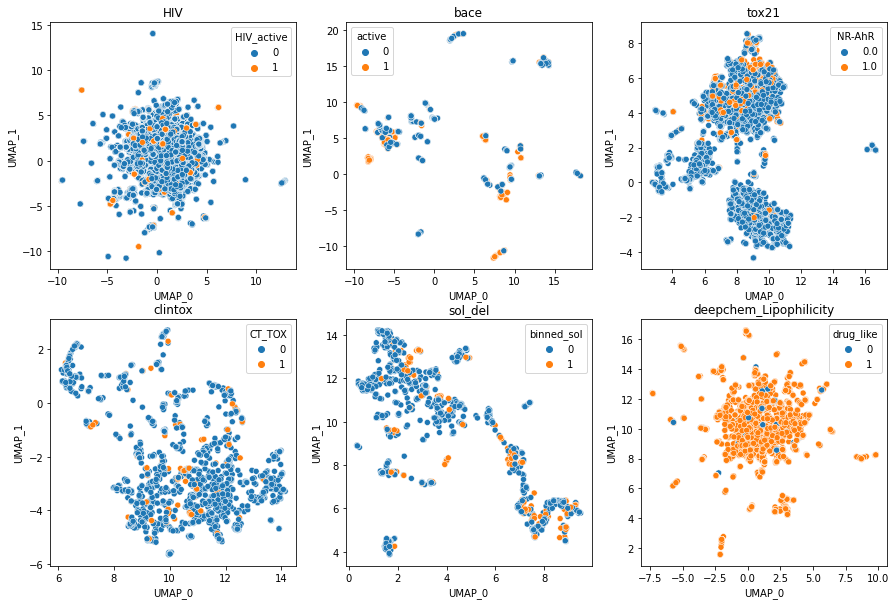

In [71]:
# look at a break down of 2D chemical space for each dataset:
# chemical space Umapping adapted from: https://blog.reverielabs.com/mapping-chemical-space-with-umap/
fig, axes = plt.subplots(2,3,figsize=(15,10))

umap_model = umap.UMAP(metric = "jaccard",
                      n_neighbors = 25,
                      n_components = 2,
                      low_memory = True,
                      min_dist = 0.001)

row=0
col=0
for file in data_map:
        # Read DataFrame:
        print(file)
        df=pd.read_csv(os.path.join(data_path_original,file+'.csv'))
        structure=data_map[file]['structure']
        target=data_map[file]['target']
        # Generate the morgan finger prints and drop any rows that don't convert to a mol, or those that don't have a target value
        radius=2
        bits=1024
        
        axes[row,col].set_title(file)
        
        df['fp'] = df[structure].apply(lambda x: generate_fingerprint(x,radius,bits))
        df.dropna(subset=['fp',target],inplace=True)
        
        #get the umap coords:
        X_umap = umap_model.fit_transform(df['fp'].to_list())
        df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]
        
        sns.scatterplot(data=df,x='UMAP_0',y='UMAP_1',hue=target,ax=axes[row,col])
        
        if col>1:
            row+=1
            col=0
        else:
            col+=1

In [73]:
# Explore similarity between different clusters/datasets?
#perhaps look at pairwise tannimoto/jaccard between them?